In [1]:
import string
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
import nltk

def expand_pos_tag(tag):
    tag_definitions = {
         "NN": "Noun, singular or mass",
        "NNS": "Noun, plural",
        "NNP": "Proper noun, singular",
        "NNPS": "Proper noun, plural",
        "VB": "Verb, base form",
        "VBD": "Verb, past tense",
        "VBG": "Verb, gerund or present participle",
        "VBN": "Verb, past participle",
        "VBP": "Verb, non-3rd person singular present",
        "VBZ": "Verb, 3rd person singular present",
        "JJ": "Adjective",
        "JJR": "Adjective, comparative",
        "JJS": "Adjective, superlative",
        "RB": "Adverb",
        "RBR": "Adverb, comparative",
        "RBS": "Adverb, superlative",
        "PRP": "Personal pronoun",
        "PRP$": "Possessive pronoun",
        "IN": "Preposition or subordinating conjunction",
        "DT": "Determiner",
        "CC": "Coordinating conjunction",
        "CD": "Cardinal number",
        "MD": "Modal",
        "EX": "Existential there",
        "FW": "Foreign word",
        "POS": "Possessive ending",
        "RP": "Particle",
        "TO": "to",
        "WDT": "Wh-determiner",
        "WP": "Wh-pronoun",
        "WP$": "Possessive wh-pronoun",
        "WRB": "Wh-adverb"
    }
    return tag_definitions.get(tag, "Other")

def process_text(text1, text2):
    word_freq = Counter()
    all_tags = Counter()
    stop_words = set(stopwords.words('english'))

    # Combine the two texts
    combined_text = text1 + " " + text2

    # Convert to lower case and remove punctuation, apostrophes, and quotations
    combined_text = combined_text.lower().translate(str.maketrans('', '', string.punctuation + "‘’“”"))

    # Tokenize and filter out stopwords
    tokens = word_tokenize(combined_text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    word_freq.update(filtered_tokens)

    # POS Tagging and expansion
    tagged = pos_tag(filtered_tokens)
    all_tags.update([expand_pos_tag(tag) for _, tag in tagged])

    return word_freq, all_tags

# Sample text blurbs
text_blurb1 = """One dark and stormy night, us kids would gather 'round the fireplace, listenin' to our pa tell tales of ghosts and monsters that lurked in the shadows. He would say, "Boys, I reckon it's time for you to know the truth," and we'd sit on the edge of our seats, our eyes wide with wonder.

"You see, back in my day, there was this one fella named Old Man Johnson. He lived out in the woods, all alone, and folks said he was cursed. They claimed he could control the elements, summoning storms and conjurin' up demons from the depths of hell."

Our voices would tremble as we asked, "Is it true, Pa? Is he real?" Our father would nod gravely, his face set in a serious expression, and say, "I wouldn't go near him if I were you. He's not someone you want to mess with."

As we drifted off to sleep that night, we couldn't shake the feeling that something was watching us, waiting for its chance to strike. And when we woke up the next mornin', the sky was filled with thick, gray clouds, and the wind howled like a pack of wolves. It was then that we knew Old Man Johnson had come for us."""
text_blurb2 =  """Title: The Cursed Woods

It was a dark and stormy night, the kind that made one want to huddle close to the fireplace with a good book. But for our group of friends, there was no escape from the woods that loomed outside. We had been warned not to venture in, but curiosity got the better of us.

"One should never enter those woods alone," said our guide, an old man with a bushy beard. "The spirits there are restless, and they don't take kindly to strangers."

We laughed at his superstitions, but as we tramped deeper into the forest, the trees seemed to grow taller and closer together. The wind howled like a pack of wolves, and the shadows grew long and menacing.

"Could this be the place?" asked Sarah, her voice barely above a whisper.

"I don't know, but I think we should turn back," replied John, his eyes scanning the darkness.

But it was too late. A figure emerged from the trees, its face hidden behind a mask of leaves. It moved towards us with slow, deliberate steps, its eyes glowing red in the dim light.

"Us must get out of here," said Tom, his voice trembling.

"See, I told you something was off," said Emily, her eyes fixed on the figure.

We turned to run, but the ground beneath us gave way. We found ourselves trapped in a circle of mushrooms, surrounded by an impenetrable wall of thorns.

"Must we find a way out," said Rachel, her breath coming in short gasps.

"Know this is some sort of curse," I muttered, my heart racing with fear.

Suddenly, the figure spoke, its voice low and raspy. "You have disturbed the peace of these woods. You will pay the price."

And with that, the thorns closed in around us, cutting off any chance of escape. We were trapped, at the mercy of the cursed woods and their malevolent spirit."""

word_freq, all_tags = process_text(text_blurb1, text_blurb2)

# Print most common words and POS tags
print("Most common words:")
for word, freq in word_freq.most_common(10):
    print(f"{word}: {freq}")

print("\nMost common Part Of Speech tags:")
for tag, count in all_tags.most_common(10):
    print(f"{tag}: {count}")

Most common words:
us: 8
woods: 6
said: 5
one: 4
would: 4
eyes: 4
night: 3
know: 3
old: 3
man: 3

Most common Part Of Speech tags:
Noun, singular or mass: 77
Adjective: 40
Noun, plural: 39
Verb, past tense: 30
Verb, non-3rd person singular present: 16
Verb, past participle: 13
Verb, base form: 12
Adverb: 10
Verb, gerund or present participle: 10
Personal pronoun: 8


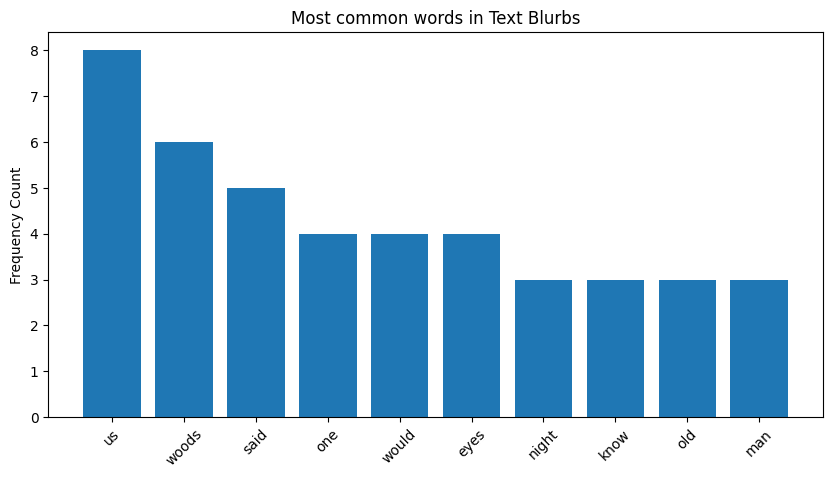

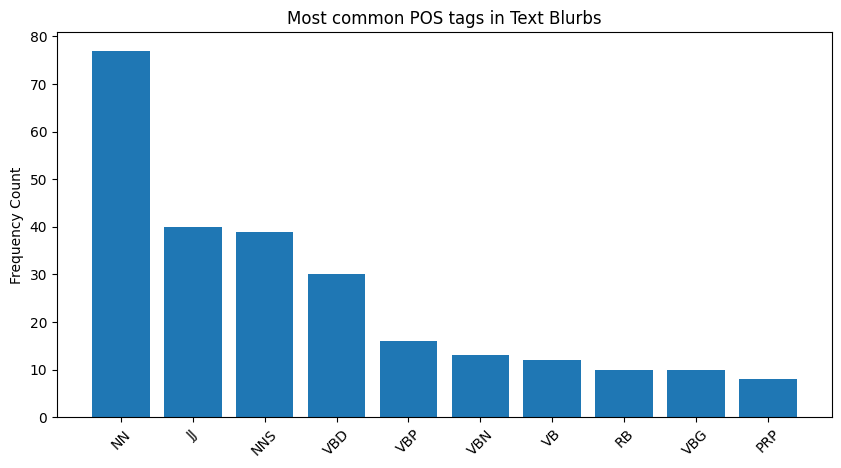

In [2]:
import matplotlib.pyplot as plt
import string
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
import nltk

def plot_common_elements(counter, title):
    elements, counts = zip(*counter.most_common(10))
    plt.figure(figsize=(10, 5))
    plt.bar(elements, counts)
    plt.title(title)
    plt.ylabel("Frequency Count")
    plt.xticks(rotation=45)
    plt.show()

def process_text(text1, text2):
    word_freq = Counter()
    all_tags = Counter()
    stop_words = set(stopwords.words('english'))

    # Combine the two texts
    combined_text = text1 + " " + text2

    # Convert to lower case and remove punctuation
    combined_text = combined_text.lower().translate(str.maketrans('', '', string.punctuation + "‘’“”"))

    # Tokenize and filter out stopwords
    tokens = word_tokenize(combined_text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    word_freq.update(filtered_tokens)

    # POS Tagging
    tagged = pos_tag(filtered_tokens)
    all_tags.update([tag for _, tag in tagged])

    return word_freq, all_tags

# Sample text blurbs
text_blurb1 = """One dark and stormy night, us kids would gather 'round the fireplace, listenin' to our pa tell tales of ghosts and monsters that lurked in the shadows. He would say, "Boys, I reckon it's time for you to know the truth," and we'd sit on the edge of our seats, our eyes wide with wonder.

"You see, back in my day, there was this one fella named Old Man Johnson. He lived out in the woods, all alone, and folks said he was cursed. They claimed he could control the elements, summoning storms and conjurin' up demons from the depths of hell."

Our voices would tremble as we asked, "Is it true, Pa? Is he real?" Our father would nod gravely, his face set in a serious expression, and say, "I wouldn't go near him if I were you. He's not someone you want to mess with."

As we drifted off to sleep that night, we couldn't shake the feeling that something was watching us, waiting for its chance to strike. And when we woke up the next mornin', the sky was filled with thick, gray clouds, and the wind howled like a pack of wolves. It was then that we knew Old Man Johnson had come for us."""
text_blurb2 = """Title: The Cursed Woods

It was a dark and stormy night, the kind that made one want to huddle close to the fireplace with a good book. But for our group of friends, there was no escape from the woods that loomed outside. We had been warned not to venture in, but curiosity got the better of us.

"One should never enter those woods alone," said our guide, an old man with a bushy beard. "The spirits there are restless, and they don't take kindly to strangers."

We laughed at his superstitions, but as we tramped deeper into the forest, the trees seemed to grow taller and closer together. The wind howled like a pack of wolves, and the shadows grew long and menacing.

"Could this be the place?" asked Sarah, her voice barely above a whisper.

"I don't know, but I think we should turn back," replied John, his eyes scanning the darkness.

But it was too late. A figure emerged from the trees, its face hidden behind a mask of leaves. It moved towards us with slow, deliberate steps, its eyes glowing red in the dim light.

"Us must get out of here," said Tom, his voice trembling.

"See, I told you something was off," said Emily, her eyes fixed on the figure.

We turned to run, but the ground beneath us gave way. We found ourselves trapped in a circle of mushrooms, surrounded by an impenetrable wall of thorns.

"Must we find a way out," said Rachel, her breath coming in short gasps.

"Know this is some sort of curse," I muttered, my heart racing with fear.

Suddenly, the figure spoke, its voice low and raspy. "You have disturbed the peace of these woods. You will pay the price."

And with that, the thorns closed in around us, cutting off any chance of escape. We were trapped, at the mercy of the cursed woods and their malevolent spirit."""
word_freq, all_tags = process_text(text_blurb1, text_blurb2)

# Visualize the most common words and POS tags from the combined text blurbs
plot_common_elements(word_freq, "Most common words in Text Blurbs")
plot_common_elements(all_tags, "Most common POS tags in Text Blurbs")

Total number of sentences: 36
Total number of words: 673
Part Of Speech counts: {'NUM': 4, 'ADJ': 29, 'CCONJ': 22, 'NOUN': 102, 'PUNCT': 119, 'PROPN': 17, 'AUX': 35, 'VERB': 88, 'DET': 53, 'ADP': 62, 'PRON': 84, 'SCONJ': 8, 'PART': 15, 'SPACE': 16, 'ADV': 19}


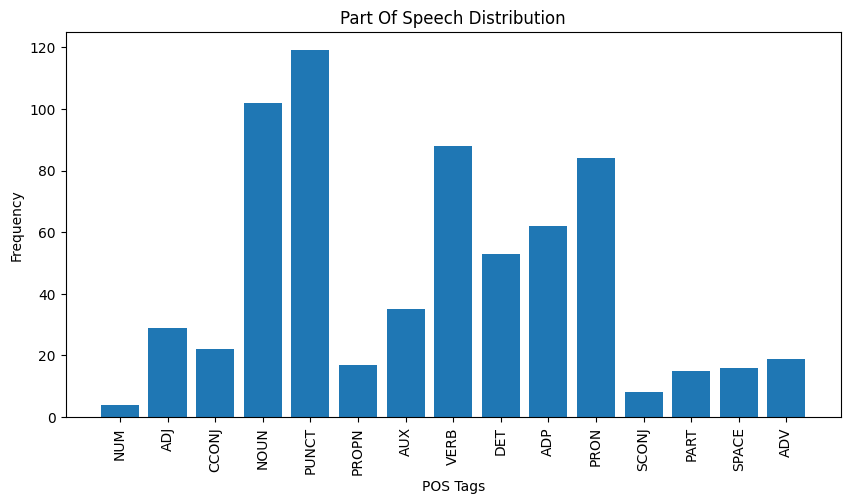

In [3]:
import matplotlib.pyplot as plt
import spacy

# Load the SpaCy model
nlp = spacy.load('en_core_web_sm')

def analyze_sentence_structure(text1, text2):
    sentence_count = 0
    word_count = 0
    pos_count = {}

    # Process each text separately and combine the results
    for text in [text1, text2]:
        doc = nlp(text)
        for sent in doc.sents:
            sentence_count += 1
            for token in sent:
                word_count += 1
                pos_count[token.pos_] = pos_count.get(token.pos_, 0) + 1

    return sentence_count, word_count, pos_count

def plot_pos_distribution(pos_count):
    labels, values = zip(*pos_count.items())
    plt.figure(figsize=(10, 5))
    plt.bar(labels, values)
    plt.title('Part Of Speech Distribution')
    plt.xlabel('POS Tags')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)  # Rotate labels for better readability
    plt.show()

# Sample text blurbs
text_blurb1 = """One dark and stormy night, us kids would gather 'round the fireplace, listenin' to our pa tell tales of ghosts and monsters that lurked in the shadows. He would say, "Boys, I reckon it's time for you to know the truth," and we'd sit on the edge of our seats, our eyes wide with wonder.

"You see, back in my day, there was this one fella named Old Man Johnson. He lived out in the woods, all alone, and folks said he was cursed. They claimed he could control the elements, summoning storms and conjurin' up demons from the depths of hell."

Our voices would tremble as we asked, "Is it true, Pa? Is he real?" Our father would nod gravely, his face set in a serious expression, and say, "I wouldn't go near him if I were you. He's not someone you want to mess with."

As we drifted off to sleep that night, we couldn't shake the feeling that something was watching us, waiting for its chance to strike. And when we woke up the next mornin', the sky was filled with thick, gray clouds, and the wind howled like a pack of wolves. It was then that we knew Old Man Johnson had come for us."""
text_blurb2 = """Title: The Cursed Woods

It was a dark and stormy night, the kind that made one want to huddle close to the fireplace with a good book. But for our group of friends, there was no escape from the woods that loomed outside. We had been warned not to venture in, but curiosity got the better of us.

"One should never enter those woods alone," said our guide, an old man with a bushy beard. "The spirits there are restless, and they don't take kindly to strangers."

We laughed at his superstitions, but as we tramped deeper into the forest, the trees seemed to grow taller and closer together. The wind howled like a pack of wolves, and the shadows grew long and menacing.

"Could this be the place?" asked Sarah, her voice barely above a whisper.

"I don't know, but I think we should turn back," replied John, his eyes scanning the darkness.

But it was too late. A figure emerged from the trees, its face hidden behind a mask of leaves. It moved towards us with slow, deliberate steps, its eyes glowing red in the dim light.

"Us must get out of here," said Tom, his voice trembling.

"See, I told you something was off," said Emily, her eyes fixed on the figure.

We turned to run, but the ground beneath us gave way. We found ourselves trapped in a circle of mushrooms, surrounded by an impenetrable wall of thorns.

"Must we find a way out," said Rachel, her breath coming in short gasps.

"Know this is some sort of curse," I muttered, my heart racing with fear.

Suddenly, the figure spoke, its voice low and raspy. "You have disturbed the peace of these woods. You will pay the price."

And with that, the thorns closed in around us, cutting off any chance of escape. We were trapped, at the mercy of the cursed woods and their malevolent spirit."""
sentence_count, word_count, pos_count = analyze_sentence_structure(text_blurb1, text_blurb2)

print(f"Total number of sentences: {sentence_count}")
print(f"Total number of words: {word_count}")
print("Part Of Speech counts:", pos_count)

# Visualize the POS distribution
plot_pos_distribution(pos_count)


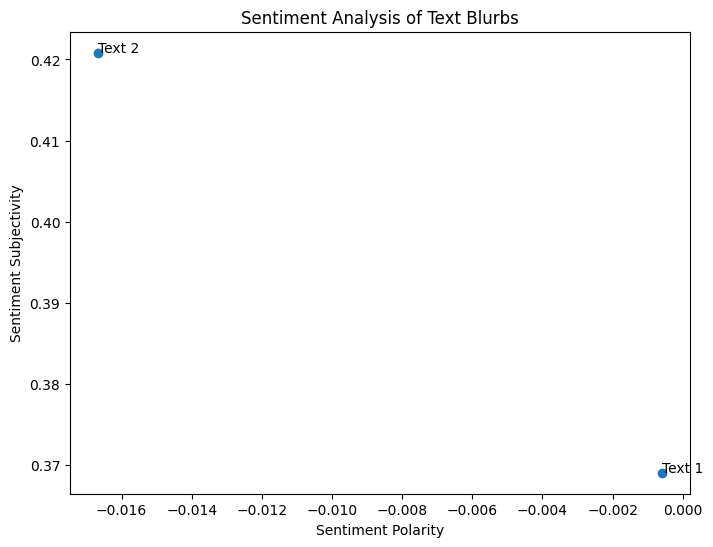

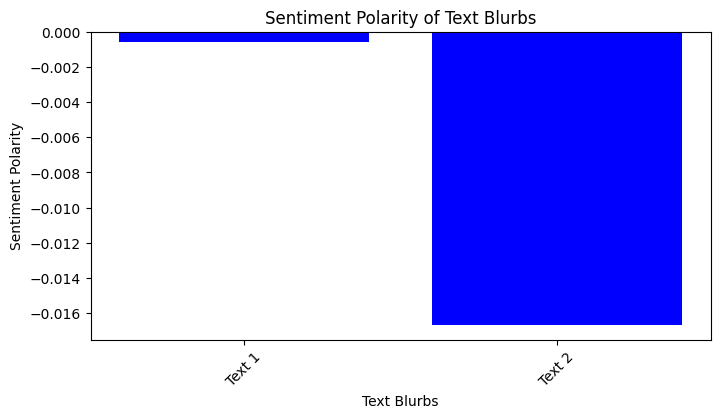

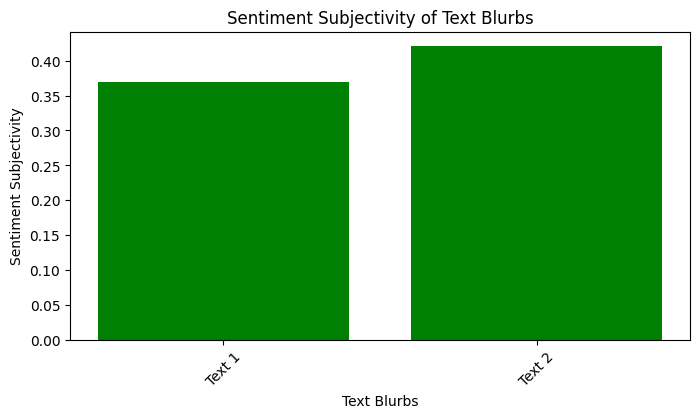

In [4]:
import matplotlib.pyplot as plt
from textblob import TextBlob

def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment

# Two sample text blurbs
text_blurb1 = """One dark and stormy night, us kids would gather 'round the fireplace, listenin' to our pa tell tales of ghosts and monsters that lurked in the shadows. He would say, "Boys, I reckon it's time for you to know the truth," and we'd sit on the edge of our seats, our eyes wide with wonder.

"You see, back in my day, there was this one fella named Old Man Johnson. He lived out in the woods, all alone, and folks said he was cursed. They claimed he could control the elements, summoning storms and conjurin' up demons from the depths of hell."

Our voices would tremble as we asked, "Is it true, Pa? Is he real?" Our father would nod gravely, his face set in a serious expression, and say, "I wouldn't go near him if I were you. He's not someone you want to mess with."

As we drifted off to sleep that night, we couldn't shake the feeling that something was watching us, waiting for its chance to strike. And when we woke up the next mornin', the sky was filled with thick, gray clouds, and the wind howled like a pack of wolves. It was then that we knew Old Man Johnson had come for us."""
text_blurb2 = """Title: The Cursed Woods

It was a dark and stormy night, the kind that made one want to huddle close to the fireplace with a good book. But for our group of friends, there was no escape from the woods that loomed outside. We had been warned not to venture in, but curiosity got the better of us.

"One should never enter those woods alone," said our guide, an old man with a bushy beard. "The spirits there are restless, and they don't take kindly to strangers."

We laughed at his superstitions, but as we tramped deeper into the forest, the trees seemed to grow taller and closer together. The wind howled like a pack of wolves, and the shadows grew long and menacing.

"Could this be the place?" asked Sarah, her voice barely above a whisper.

"I don't know, but I think we should turn back," replied John, his eyes scanning the darkness.

But it was too late. A figure emerged from the trees, its face hidden behind a mask of leaves. It moved towards us with slow, deliberate steps, its eyes glowing red in the dim light.

"Us must get out of here," said Tom, his voice trembling.

"See, I told you something was off," said Emily, her eyes fixed on the figure.

We turned to run, but the ground beneath us gave way. We found ourselves trapped in a circle of mushrooms, surrounded by an impenetrable wall of thorns.

"Must we find a way out," said Rachel, her breath coming in short gasps.

"Know this is some sort of curse," I muttered, my heart racing with fear.

Suddenly, the figure spoke, its voice low and raspy. "You have disturbed the peace of these woods. You will pay the price."

And with that, the thorns closed in around us, cutting off any chance of escape. We were trapped, at the mercy of the cursed woods and their malevolent spirit."""
# Analyze sentiment of the text blurbs
sentiment1 = analyze_sentiment(text_blurb1)
sentiment2 = analyze_sentiment(text_blurb2)

sentiments = [("Text 1", sentiment1.polarity, sentiment1.subjectivity),
              ("Text 2", sentiment2.polarity, sentiment2.subjectivity)]

# Extracting labels, polarities, and subjectivities
labels, polarities, subjectivities = zip(*sentiments)

# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(polarities, subjectivities)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Sentiment Subjectivity')
plt.title('Sentiment Analysis of Text Blurbs')
for i, label in enumerate(labels):
    plt.annotate(label, (polarities[i], subjectivities[i]))
plt.show()

# Bar Chart for Polarity
plt.figure(figsize=(8, 4))
plt.bar(labels, polarities, color='blue')
plt.xlabel('Text Blurbs')
plt.ylabel('Sentiment Polarity')
plt.title('Sentiment Polarity of Text Blurbs')
plt.xticks(rotation=45)
plt.show()

# Bar Chart for Subjectivity
plt.figure(figsize=(8, 4))
plt.bar(labels, subjectivities, color='green')
plt.xlabel('Text Blurbs')
plt.ylabel('Sentiment Subjectivity')
plt.title('Sentiment Subjectivity of Text Blurbs')
plt.xticks(rotation=45)
plt.show()

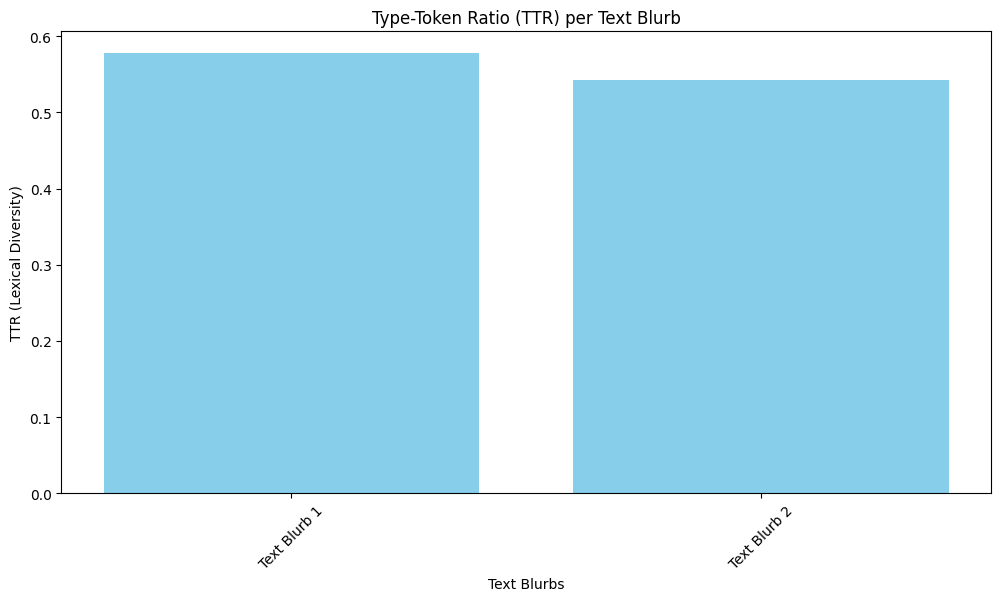

Overall Lexical Diversity for both Text Blurbs: 0.462


In [5]:
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk

# Function to calculate TTR
def calculate_ttr(text):
    tokens = word_tokenize(text)
    types = set(tokens)
    if len(tokens) == 0:
        return 0
    return len(types) / len(tokens)

# Function to plot TTR
def plot_ttr(ttr_values, title):
    blurbs, ttr_scores = zip(*ttr_values)
    plt.figure(figsize=(12, 6))
    plt.bar(blurbs, ttr_scores, color='skyblue')
    plt.xlabel('Text Blurbs')
    plt.ylabel('TTR (Lexical Diversity)')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Sample text blurbs
text_blurb1 = """One dark and stormy night, us kids would gather 'round the fireplace, listenin' to our pa tell tales of ghosts and monsters that lurked in the shadows. He would say, "Boys, I reckon it's time for you to know the truth," and we'd sit on the edge of our seats, our eyes wide with wonder.

"You see, back in my day, there was this one fella named Old Man Johnson. He lived out in the woods, all alone, and folks said he was cursed. They claimed he could control the elements, summoning storms and conjurin' up demons from the depths of hell."

Our voices would tremble as we asked, "Is it true, Pa? Is he real?" Our father would nod gravely, his face set in a serious expression, and say, "I wouldn't go near him if I were you. He's not someone you want to mess with."

As we drifted off to sleep that night, we couldn't shake the feeling that something was watching us, waiting for its chance to strike. And when we woke up the next mornin', the sky was filled with thick, gray clouds, and the wind howled like a pack of wolves. It was then that we knew Old Man Johnson had come for us."""
text_blurb2 = """Title: The Cursed Woods

It was a dark and stormy night, the kind that made one want to huddle close to the fireplace with a good book. But for our group of friends, there was no escape from the woods that loomed outside. We had been warned not to venture in, but curiosity got the better of us.

"One should never enter those woods alone," said our guide, an old man with a bushy beard. "The spirits there are restless, and they don't take kindly to strangers."

We laughed at his superstitions, but as we tramped deeper into the forest, the trees seemed to grow taller and closer together. The wind howled like a pack of wolves, and the shadows grew long and menacing.

"Could this be the place?" asked Sarah, her voice barely above a whisper.

"I don't know, but I think we should turn back," replied John, his eyes scanning the darkness.

But it was too late. A figure emerged from the trees, its face hidden behind a mask of leaves. It moved towards us with slow, deliberate steps, its eyes glowing red in the dim light.

"Us must get out of here," said Tom, his voice trembling.

"See, I told you something was off," said Emily, her eyes fixed on the figure.

We turned to run, but the ground beneath us gave way. We found ourselves trapped in a circle of mushrooms, surrounded by an impenetrable wall of thorns.

"Must we find a way out," said Rachel, her breath coming in short gasps.

"Know this is some sort of curse," I muttered, my heart racing with fear.

Suddenly, the figure spoke, its voice low and raspy. "You have disturbed the peace of these woods. You will pay the price."

And with that, the thorns closed in around us, cutting off any chance of escape. We were trapped, at the mercy of the cursed woods and their malevolent spirit."""
ttr_values = [
    ("Text Blurb 1", calculate_ttr(text_blurb1)),
    ("Text Blurb 2", calculate_ttr(text_blurb2))
]

# Plot TTR for each text blurb
plot_ttr(ttr_values, "Type-Token Ratio (TTR) per Text Blurb")

# Overall TTR for both text blurbs combined
overall_text = text_blurb1 + " " + text_blurb2
overall_ttr = calculate_ttr(overall_text)
print(f"Overall Lexical Diversity for both Text Blurbs: {overall_ttr:.3f}")


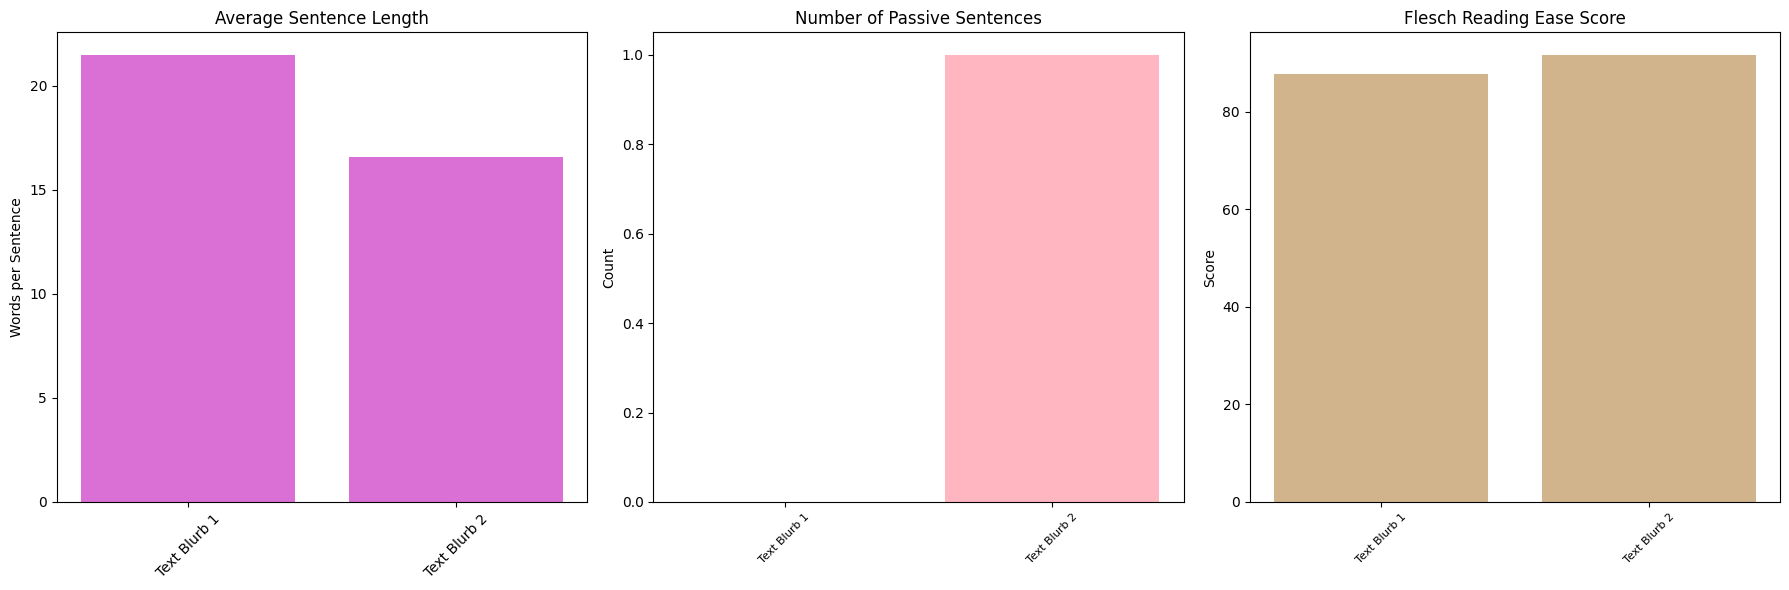

In [6]:
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from textblob import TextBlob
import textstat

# Function to analyze the style of a given text
def analyze_style(text):
    sentences = sent_tokenize(text)
    if len(sentences) == 0:
        return 0, 0, 0  # Avoid division by zero

    average_sentence_length = sum(len(word_tokenize(sentence)) for sentence in sentences) / len(sentences)
    blob = TextBlob(text)
    passive_sentences = sum(1 for sentence in blob.sentences if sentence.tags and sentence.tags[0][1] in ['VBN', 'VBD'])

    flesch_reading_ease = textstat.flesch_reading_ease(text)

    return average_sentence_length, passive_sentences, flesch_reading_ease

# Sample text blurbs
text_blurb1 = """One dark and stormy night, us kids would gather 'round the fireplace, listenin' to our pa tell tales of ghosts and monsters that lurked in the shadows. He would say, "Boys, I reckon it's time for you to know the truth," and we'd sit on the edge of our seats, our eyes wide with wonder.

"You see, back in my day, there was this one fella named Old Man Johnson. He lived out in the woods, all alone, and folks said he was cursed. They claimed he could control the elements, summoning storms and conjurin' up demons from the depths of hell."

Our voices would tremble as we asked, "Is it true, Pa? Is he real?" Our father would nod gravely, his face set in a serious expression, and say, "I wouldn't go near him if I were you. He's not someone you want to mess with."

As we drifted off to sleep that night, we couldn't shake the feeling that something was watching us, waiting for its chance to strike. And when we woke up the next mornin', the sky was filled with thick, gray clouds, and the wind howled like a pack of wolves. It was then that we knew Old Man Johnson had come for us."""
text_blurb2 = """Title: The Cursed Woods

It was a dark and stormy night, the kind that made one want to huddle close to the fireplace with a good book. But for our group of friends, there was no escape from the woods that loomed outside. We had been warned not to venture in, but curiosity got the better of us.

"One should never enter those woods alone," said our guide, an old man with a bushy beard. "The spirits there are restless, and they don't take kindly to strangers."

We laughed at his superstitions, but as we tramped deeper into the forest, the trees seemed to grow taller and closer together. The wind howled like a pack of wolves, and the shadows grew long and menacing.

"Could this be the place?" asked Sarah, her voice barely above a whisper.

"I don't know, but I think we should turn back," replied John, his eyes scanning the darkness.

But it was too late. A figure emerged from the trees, its face hidden behind a mask of leaves. It moved towards us with slow, deliberate steps, its eyes glowing red in the dim light.

"Us must get out of here," said Tom, his voice trembling.

"See, I told you something was off," said Emily, her eyes fixed on the figure.

We turned to run, but the ground beneath us gave way. We found ourselves trapped in a circle of mushrooms, surrounded by an impenetrable wall of thorns.

"Must we find a way out," said Rachel, her breath coming in short gasps.

"Know this is some sort of curse," I muttered, my heart racing with fear.

Suddenly, the figure spoke, its voice low and raspy. "You have disturbed the peace of these woods. You will pay the price."

And with that, the thorns closed in around us, cutting off any chance of escape. We were trapped, at the mercy of the cursed woods and their malevolent spirit."""
# Analyze style for each text blurb
style_data = [
    ("Text Blurb 1", *analyze_style(text_blurb1)),
    ("Text Blurb 2", *analyze_style(text_blurb2))
]

# Extracting data for visualization
blurbs, avg_lengths, passive_counts, reading_eases = zip(*style_data)

# Visualization
plt.figure(figsize=(18, 6))  # Increase the size of the figure

# Average Sentence Length
plt.subplot(1, 3, 1)
plt.bar(blurbs, avg_lengths, color='orchid')
plt.title('Average Sentence Length')
plt.xticks(rotation=45, fontsize=10)  # Rotate and adjust font size
plt.ylabel('Words per Sentence')

# Passive Sentences Count
plt.subplot(1, 3, 2)
plt.bar(blurbs, passive_counts, color='lightpink')
plt.title('Number of Passive Sentences')
plt.xticks(rotation=45, fontsize=8)  # Rotate and adjust font size
plt.ylabel('Count')

# Flesch Reading Ease Score
plt.subplot(1, 3, 3)
plt.bar(blurbs, reading_eases, color='tan')
plt.title('Flesch Reading Ease Score')
plt.xticks(rotation=45, fontsize=8)  # Rotate and adjust font size
plt.ylabel('Score')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [7]:
import spacy
import re

nlp = spacy.load('en_core_web_sm')

def extract_dialogues(text):
    dialogues = re.findall(r'“([^”]+)”', text)
    cleaned_dialogues = [' '.join(dialogue.split()) for dialogue in dialogues]  # Remove extra spaces and newlines
    return cleaned_dialogues

def extract_characters_and_dialogues(text):
    doc = nlp(text)
    characters = set([ent.text for ent in doc.ents if ent.label_ == "PERSON"])
    dialogues = extract_dialogues(text)
    return characters, dialogues

# Sample text blurbs
text_blurb1 = """One dark and stormy night, us kids would gather 'round the fireplace, listenin' to our pa tell tales of ghosts and monsters that lurked in the shadows. He would say, "Boys, I reckon it's time for you to know the truth," and we'd sit on the edge of our seats, our eyes wide with wonder.

"You see, back in my day, there was this one fella named Old Man Johnson. He lived out in the woods, all alone, and folks said he was cursed. They claimed he could control the elements, summoning storms and conjurin' up demons from the depths of hell."

Our voices would tremble as we asked, "Is it true, Pa? Is he real?" Our father would nod gravely, his face set in a serious expression, and say, "I wouldn't go near him if I were you. He's not someone you want to mess with."

As we drifted off to sleep that night, we couldn't shake the feeling that something was watching us, waiting for its chance to strike. And when we woke up the next mornin', the sky was filled with thick, gray clouds, and the wind howled like a pack of wolves. It was then that we knew Old Man Johnson had come for us."""
text_blurb2 = """Title: The Cursed Woods

It was a dark and stormy night, the kind that made one want to huddle close to the fireplace with a good book. But for our group of friends, there was no escape from the woods that loomed outside. We had been warned not to venture in, but curiosity got the better of us.

"One should never enter those woods alone," said our guide, an old man with a bushy beard. "The spirits there are restless, and they don't take kindly to strangers."

We laughed at his superstitions, but as we tramped deeper into the forest, the trees seemed to grow taller and closer together. The wind howled like a pack of wolves, and the shadows grew long and menacing.

"Could this be the place?" asked Sarah, her voice barely above a whisper.

"I don't know, but I think we should turn back," replied John, his eyes scanning the darkness.

But it was too late. A figure emerged from the trees, its face hidden behind a mask of leaves. It moved towards us with slow, deliberate steps, its eyes glowing red in the dim light.

"Us must get out of here," said Tom, his voice trembling.

"See, I told you something was off," said Emily, her eyes fixed on the figure.

We turned to run, but the ground beneath us gave way. We found ourselves trapped in a circle of mushrooms, surrounded by an impenetrable wall of thorns.

"Must we find a way out," said Rachel, her breath coming in short gasps.

"Know this is some sort of curse," I muttered, my heart racing with fear.

Suddenly, the figure spoke, its voice low and raspy. "You have disturbed the peace of these woods. You will pay the price."

And with that, the thorns closed in around us, cutting off any chance of escape. We were trapped, at the mercy of the cursed woods and their malevolent spirit.
"""
# Extract and print characters and dialogues for each text blurb
print("Text Blurb 1:")
characters1, dialogues1 = extract_characters_and_dialogues(text_blurb1)
print("Characters:", characters1)
print("Sample Dialogues:", dialogues1[:5])  # Display first 5 dialogues

print("\nText Blurb 2:")
characters2, dialogues2 = extract_characters_and_dialogues(text_blurb2)
print("Characters:", characters2)
print("Sample Dialogues:", dialogues2[:5])  # Display first 5 dialogues

Text Blurb 1:
Characters: {'Man Johnson'}
Sample Dialogues: []

Text Blurb 2:
Characters: {'Emily', 'Rachel', 'Sarah', 'Tom', 'John'}
Sample Dialogues: []


In [8]:
import spacy
from collections import defaultdict

nlp = spacy.load('en_core_web_sm')

def extract_interactions(text):
    doc = nlp(text)
    interactions = defaultdict(int)

    for sent in doc.sents:
        characters = set([ent.text for ent in sent.ents if ent.label_ == "PERSON"])
        for char1 in characters:
            for char2 in characters:
                if char1 != char2:
                    interactions[(char1, char2)] += 1

    return interactions

# Sample text blurbs
text_blurb1 = """One dark and stormy night, us kids would gather 'round the fireplace, listenin' to our pa tell tales of ghosts and monsters that lurked in the shadows. He would say, "Boys, I reckon it's time for you to know the truth," and we'd sit on the edge of our seats, our eyes wide with wonder.

"You see, back in my day, there was this one fella named Old Man Johnson. He lived out in the woods, all alone, and folks said he was cursed. They claimed he could control the elements, summoning storms and conjurin' up demons from the depths of hell."

Our voices would tremble as we asked, "Is it true, Pa? Is he real?" Our father would nod gravely, his face set in a serious expression, and say, "I wouldn't go near him if I were you. He's not someone you want to mess with."

As we drifted off to sleep that night, we couldn't shake the feeling that something was watching us, waiting for its chance to strike. And when we woke up the next mornin', the sky was filled with thick, gray clouds, and the wind howled like a pack of wolves. It was then that we knew Old Man Johnson had come for us."""
text_blurb2 = """Title: The Cursed Woods

It was a dark and stormy night, the kind that made one want to huddle close to the fireplace with a good book. But for our group of friends, there was no escape from the woods that loomed outside. We had been warned not to venture in, but curiosity got the better of us.

"One should never enter those woods alone," said our guide, an old man with a bushy beard. "The spirits there are restless, and they don't take kindly to strangers."

We laughed at his superstitions, but as we tramped deeper into the forest, the trees seemed to grow taller and closer together. The wind howled like a pack of wolves, and the shadows grew long and menacing.

"Could this be the place?" asked Sarah, her voice barely above a whisper.

"I don't know, but I think we should turn back," replied John, his eyes scanning the darkness.

But it was too late. A figure emerged from the trees, its face hidden behind a mask of leaves. It moved towards us with slow, deliberate steps, its eyes glowing red in the dim light.

"Us must get out of here," said Tom, his voice trembling.

"See, I told you something was off," said Emily, her eyes fixed on the figure.

We turned to run, but the ground beneath us gave way. We found ourselves trapped in a circle of mushrooms, surrounded by an impenetrable wall of thorns.

"Must we find a way out," said Rachel, her breath coming in short gasps.

"Know this is some sort of curse," I muttered, my heart racing with fear.

Suddenly, the figure spoke, its voice low and raspy. "You have disturbed the peace of these woods. You will pay the price."

And with that, the thorns closed in around us, cutting off any chance of escape. We were trapped, at the mercy of the cursed woods and their malevolent spirit."""
# Extract and print interactions for each text blurb
print("Interactions in Text Blurb 1:")
interactions1 = extract_interactions(text_blurb1)
for pair, count in interactions1.items():
    print(f"{pair}: {count}")

print("\nInteractions in Text Blurb 2:")
interactions2 = extract_interactions(text_blurb2)
for pair, count in interactions2.items():
    print(f"{pair}: {count}")

Interactions in Text Blurb 1:

Interactions in Text Blurb 2:
